## Modelos de Ahorro/Inversión Mediante Fondos de Inversión

Un inversionista tiene cierta cantidad de dinero y quiere hacer uso de él invirtiendolo en algún fondo de inversión. Este inversionista, decida ir con un grupo financiero a que le ofrezcan 3 diferentes planes, con ventajas y desventajas cada uno, en los cuales, el puede invertir. 

Problema:

Sacar mediante el algoritmo de interés compuesto, el rendimiento

#### Objetivo General:

Se pretende mostrar la mejor opción de inversión mediante la formulación de diversos supuestos ofrecidos por fondos de inversión. 

#### Objetivos especificos:

-Ejecutar de manera eficiente el programa
-Elejir la opción más viable para el inversor
-Desarrollar un problema con sentido


**Escenario A**

El Fondo de ahorro le pide 1M para invertir en CETES con tasa de interés del 7% anual.
Cuando el inversor obtenga el doble de su inversión se le regresara su capital inicial y el resto seguirá en el fondo. La liquidez de este escenario es semanal. A parte, es de capitalización continua compuesta. ¿En cuanto tiempo logrará llegar a los dos millones?


**Escenario B**

Le piden una cantidad de 500 K para invertirlo en determinados contratos con Riesgo BBB con un retorno de inversión del 15%, donde su liquidez es mensualmente pero se requiere también tener el dinero. El inversor planea hacer una inversión no mayor a 15 años.

**Escenario C**

En este el fondo de inversión es más riesgoso pero el retorno es mayor además la liquidez es cada semestre, se pide un mínimo de 200K con un retorno de inversión del 35%, la inversión se hará en empresas calificadas B o C`s pero son empresas nuevas. Aquí el inversor espera llegar al menos al millon de pesos.



In [16]:
import numpy as np
import pandas as pd
from ipywidgets import *
import matplotlib.pyplot as plt
import sympy as sym
from scipy.integrate import solve_ivp

Ecuación diferencial:

$$\frac{d C(t)}{dt}=r\; C(t),$$

$$C(t) = C_0e^{rt}$$
    

**El fenomeno que involucramos es el de capitalización compuesta que consta de la reinversión de las ganancias dadas.**

In [19]:
#Escenario A
def Ccontinua(C0,r,meta):
    t=np.log(meta/C0)/r
    def dC(t,C):
        return r*C
    sol=solve_ivp(dC,(0,t),[C0],max_step=0.01)
    
    plt.plot(sol.t,sol.y[0,:])
    plt.plot([0,t],[meta,meta],'--k')
    plt.xlabel('años')
    plt.grid()

i=0.07
interact_manual(Ccontinua,C0=fixed(1000000),r=fixed(np.log(1+i)),meta=(2000000,2500000,10000))

interactive(children=(IntSlider(value=2250000, description='meta', max=2500000, min=2000000, step=10000), Butt…

<function __main__.Ccontinua(C0, r, meta)>

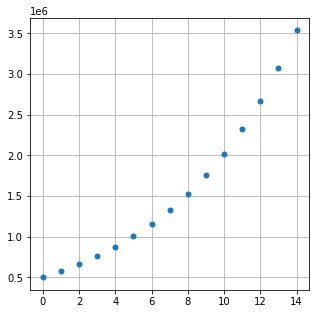

In [20]:
#Escenario B
def interes_compuesto(t,i,C0):
    periodos=np.linspace(0,t,t+1)
    Ck=C0*(1+i)**periodos
    plt.figure(figsize=(5,5))
    plt.plot(periodos,Ck,'o',ms=5)
    #plt.plot([0,t],[meta,meta],'--t')
    plt.grid()
interes_compuesto(14,.15,500000)

In [22]:
#Escenario C
def interes_compuesto(meta,i,C0):
    k=np.ceil(np.log(meta/C0)/np.log(1+i)).astype(int)
    periodos=np.linspace(0,k,k+1)
    Ck=C0*(1+i)**periodos
    plt.figure(figsize=(5,5))
    plt.plot(periodos,Ck,'o',ms=5)
    plt.plot([0,k],[meta,meta],'--k')
    plt.grid()
interact_manual(interes_compuesto,meta=(1000000,1500000,10000),i=fixed(0.35),C0=fixed(200000))

interactive(children=(IntSlider(value=1250000, description='meta', max=1500000, min=1000000, step=10000), Butt…

<function __main__.interes_compuesto(meta, i, C0)>

### Conclusiones:

El algoritmo nos conduce a una solución factible y nos simplificó la toma de decisión en base a las opciones orfecidas. ¿Por qué? Considerando las diversas variables que el fondo nos ofrecia para cada plan, la mejor opción fue el escenario B. Debido a su riesgo asumible y su posible rendimiento en un lapso de tiempo similar al de las otras opciones, lo ideal sería irnos por esa opción que a 14 años ofrece un rendimiento de un poco más de 3.5 millones.